# 0.데이터 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install koreanize-matplotlib
import koreanize_matplotlib

In [3]:
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
dlq = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_A_DLQ.csv')             # 연체정보(금융회사, 대부회사)
pub = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_A_PUB.csv')             # 연체정보(공공기관)

ln = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_P_LN.csv')               # 개인대출정보(금융권)
ln_sp = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_P_LN_SP.csv')         # 개인대출정보(대부업권)

cd_opn = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_P_CD_OPN.csv')       # 카드개설정보
cd_usg = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_P_CD_USG.csv')       # 카드이용정보

grnt = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_P_GRNT.csv')           # 채무보증정보

In [4]:
id = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_A_ID.csv')                   # 차주정보

rlps = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_I_CT_RLPS.csv')            # 보험계약관계자정보
cont = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_I_CT_CONT_PVT.csv')        # 보험계약정보
mgg = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_I_CT_MGG_PVT.csv')          # 보험담보정보

accd = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_I_PT_ACCD.csv')            # 청구사고정보
claim_cont = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_I_PT_CONT.csv')      # 청구계약정보
pmnt = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_I_PT_PMNT.csv')            # 청구지급사유정보
pmntdtl = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_I_PT_PMNTDTL.csv')      # 청구지급상세사유정보
vctm = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_I_PT_VCTM.csv')            # 청구피해자물정보

In [ ]:
desc = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_A_DESC.csv')                   # 기업정보

# 1. 데이터 확인

## 1-2. 보험계약관계자정보

1. 개인사업자 삭제하는 방향으로 간다면, 차주정보에서 필터링한 데이터프레임 이용해서 개인사업자 삭제
2. SCTR_CD : 손보 상품인지, 생보 상품인지 확인이 필요하다면 삭제 X
3. COM_SN : 다른 차주 간에 POL_SN가 겹친다면, 차주일련번호 혹은 COM_SN로 확인?
4. CT_RLPS_GBN_CD가 C인 것 중에, CT_IN_RLTN_CD가 1인 건은 CT_RLPS_GBN_CD를 I로 바꾸고 I인 행만 사용, 이후 중복 행 제외
  
  => 한 차주에 대해 증권번호가 중복되는 경우 확인되어 삭제 필요
5. IS_ME : 삭제, 유니크 값 수가 1개
6. IS_INDIV : 의미를 모르겠음

In [ ]:
rlps

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,POL_SN,CT_RLPS_GBN_CD,CT_IN_RLTN_CD,IS_INDIV,GIS_CD
0,1486482,1,6,7623841,0,1771111,C,99,1,34
1,15110,1,8,6937331,0,2197182,C,1,1,11
2,993239,1,6,8573374,0,2471577,C,99,1,34
3,1412979,1,8,8532740,0,5984883,I,1,1,31
4,451383,1,6,8845001,0,6088957,I,1,1,31
...,...,...,...,...,...,...,...,...,...,...
379023,1482703,1,8,3685558,0,9493522,C,1,1,99
379024,368880,1,6,7497975,0,3084080,C,1,1,99
379025,1284883,1,6,9279409,0,8695881,I,1,1,11
379026,1567278,1,8,9281635,0,8145242,C,1,1,37


In [ ]:
p_rlps = rlps[rlps['JOIN_SN_TYP'] == 1]

In [ ]:
dupl_rlps = p_rlps[p_rlps.duplicated(subset=['POL_SN'], keep=False)].sort_values(by='POL_SN')   # keep=False : 중복 행 모두 선택
dupl_rlps

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,POL_SN,CT_RLPS_GBN_CD,CT_IN_RLTN_CD,IS_INDIV,GIS_CD
26615,902434,1,6,2092413,0,8,I,1,1,34
154876,902434,1,6,2092413,0,8,C,99,1,34
119289,996067,1,6,540229,0,37,C,1,1,99
256236,996067,1,6,540229,0,37,I,1,1,99
149834,930108,1,8,7791590,0,43,I,1,1,21
...,...,...,...,...,...,...,...,...,...,...
83350,1052214,1,8,8500638,0,9997340,I,99,1,11
247202,751928,1,6,2712768,0,9997367,I,1,1,99
100333,751928,1,6,2712768,0,9997367,C,1,1,99
90894,1816669,1,6,4973683,0,9997407,I,3,1,38


In [ ]:
p_rlps_C = p_rlps[p_rlps['CT_RLPS_GBN_CD'] == 'C']
p_rlps_C.agg(['count', 'size', 'nunique'])

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,POL_SN,CT_RLPS_GBN_CD,CT_IN_RLTN_CD,IS_INDIV,GIS_CD
count,149927,149927,149927,149927,149927,149927,149927,149927,149927,149927
size,149927,149927,149927,149927,149927,149927,149927,149927,149927,149927
nunique,30971,1,3,86900,1,149255,1,6,2,17


In [ ]:
p_rlps_I = p_rlps[p_rlps['CT_RLPS_GBN_CD'] == 'I']
p_rlps_I.agg(['count', 'size', 'nunique'])

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,POL_SN,CT_RLPS_GBN_CD,CT_IN_RLTN_CD,IS_INDIV,GIS_CD
count,229101,229101,229101,229101,229101,229101,229101,229101,229101,229101
size,229101,229101,229101,229101,229101,229101,229101,229101,229101,229101
nunique,45813,1,3,141918,1,224123,1,6,2,17


In [ ]:
dupl_rlps.agg(['count', 'size', 'nunique'])

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,POL_SN,CT_RLPS_GBN_CD,CT_IN_RLTN_CD,IS_INDIV,GIS_CD
count,256560,256560,256560,256560,256560,256560,256560,256560,256560,256560
size,256560,256560,256560,256560,256560,256560,256560,256560,256560,256560
nunique,31762,1,3,83310,1,126285,2,6,2,17


In [ ]:
group_rlps = rlps.groupby('POL_SN').size()
group_rlps

POL_SN
8          2
37         2
43         2
66         1
87         2
          ..
9997320    1
9997333    1
9997340    2
9997367    2
9997407    2
Length: 248753, dtype: int64

In [ ]:
df = rlps[rlps['POL_SN'].isin(group_rlps[group_rlps >= 3].index)]
df

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,POL_SN,CT_RLPS_GBN_CD,CT_IN_RLTN_CD,IS_INDIV,GIS_CD
0,1486482,1,6,7623841,0,1771111,C,99,1,34
16,1028026,1,6,5021660,0,5893234,I,99,1,99
30,108895,1,6,3335026,0,4346972,I,99,1,99
115,248011,1,6,5180401,0,3149384,I,1,1,99
225,515814,1,6,1338997,0,8101729,I,1,1,99
...,...,...,...,...,...,...,...,...,...,...
378824,1725278,1,6,4540994,0,1241029,I,1,1,99
378861,437751,1,6,9172025,0,1850652,I,99,1,99
378916,1551526,1,6,8735033,0,9009696,I,1,1,99
378937,1171920,1,6,8032544,0,1602234,I,1,1,99


In [ ]:
rlps[rlps['POL_SN'] == 5893234]

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,POL_SN,CT_RLPS_GBN_CD,CT_IN_RLTN_CD,IS_INDIV,GIS_CD
16,1028026,1,6,5021660,0,5893234,I,99,1,99
11572,193207,1,6,1526990,0,5893234,I,99,1,99
85971,1571189,1,6,4610528,0,5893234,I,99,1,99
353833,1338650,1,6,1267236,0,5893234,I,99,1,99
361300,1587313,1,6,3502115,0,5893234,I,99,1,99


In [7]:
rlps[rlps['POL_SN'] == 8]

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,POL_SN,CT_RLPS_GBN_CD,CT_IN_RLTN_CD,IS_INDIV,GIS_CD
26615,902434,1,6,2092413,0,8,I,1,1,34
154876,902434,1,6,2092413,0,8,C,99,1,34


## 1-3. 보험계약정보

0.
1. 기준년월과 주계약상태코드로 계약유지율 확인?
  * 납입 주기가 보험마다 달라서 기준년월로는 정확하지 않을 것 같음. 기준년월 없어도 될 듯
  * 추후에 사용법 다시 생각나면 그때 살리기
2. IS_GRP_INS(단체보험여부) : 단체보험인 경우는 개인 의지로 가입한 상품이 아니니 제외?
  * 이미 단체보험이 있으니 개인 보험이 필요 없어서 가입하지 않는 경우
  * 단체보험이 있어도 보험에 대한 무지 혹은 필요성으로 추가로 개인이 보험 가입하는 경우
  
  ... 등 이 있을 수도?
3. 증권번호가 보험계약관계자정보에서 추출한 정보와 일치하는 경우에만 사용 => 개인 건만 선택하기 위해
4. 증권번호, 보험종류 코드가 중복되는 행들이 많음 => 왜 중복 행들이 나타났는지 케이스 확인 필요
  * 딱히 사유는 모르겠지만, 중간에 월납 보험료가 달라지는 경우 중복으로 나타나기도 함
  * 기준년월 이용해서 전체기간 납입 보험료 확인...? 더 깊게 생각해 볼 것
5. 진단계약 컬럼 : 진단계약인 경우의 건수가 적음,

In [ ]:
cont

,SCTR_CD,POL_SN,IS_GRP_INS,INS_GBN_CD,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,CT_RST_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,IS_CT_DIGNS,CT_JDGMT_CD,CT_CHNL_CD,YM_201806,YM_201807,YM_201808,YM_201809,YM_201810,YM_201811,YM_201812,YM_201901,YM_201902,YM_201903,YM_201904,YM_201905,YM_201906,YM_201907,YM_201908,YM_201909,YM_201910,YM_201911,YM_201912,YM_202001,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006
0,6,3023157,0,3,7,200806,200903,200806,200906,999912,999912,10,2,1,0,1,6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,8,2067576,0,1,2,201012,999912,201012,999912,999912,999912,33,2,20,0,1,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,6,7995898,0,7,2,201409,999912,201409,999912,999912,999912,52,2,30,0,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
3,8,9743978,0,4,7,201604,201704,201604,201704,999912,999912,170,3,1,0,1,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,6,9040681,0,4,2,201804,999912,201804,204804,999912,202006,43,2,25,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368478,8,6242384,0,7,2,201212,999912,201212,203812,999912,999912,47,2,10,0,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
368479,6,2265670,0,14,5,201604,999912,201604,201604,999912,999912,31,1,0,0,1,99,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
368480,6,6050915,0,7,7,200902,201107,200902,201902,999912,999912,15,2,10,0,1,6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
368481,6,9901184,0,14,2,201809,999912,201809,201902,999912,999912,96,1,0,0,1,5,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cont.agg(['count', 'size', 'nunique'])

,SCTR_CD,POL_SN,IS_GRP_INS,INS_GBN_CD,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,CT_RST_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,IS_CT_DIGNS,CT_JDGMT_CD,CT_CHNL_CD,YM_201806,YM_201807,YM_201808,YM_201809,YM_201810,YM_201811,YM_201812,YM_201901,YM_201902,YM_201903,YM_201904,YM_201905,YM_201906,YM_201907,YM_201908,YM_201909,YM_201910,YM_201911,YM_201912,YM_202001,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006
count,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483
size,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483
nunique,3,244232,2,18,10,163,181,163,1120,174,166,233,4,100,2,8,8,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [6]:
cont[cont['POL_SN'] == 5893234]

,SCTR_CD,POL_SN,IS_GRP_INS,INS_GBN_CD,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,CT_RST_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,IS_CT_DIGNS,CT_JDGMT_CD,CT_CHNL_CD,YM_201806,YM_201807,YM_201808,YM_201809,YM_201810,YM_201811,YM_201812,YM_201901,YM_201902,YM_201903,YM_201904,YM_201905,YM_201906,YM_201907,YM_201908,YM_201909,YM_201910,YM_201911,YM_201912,YM_202001,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006
101191,6,5893234,0,14,5,201112,999912,201112,201112,999912,999912,1000,1,0,0,1,99,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
121351,6,5893234,0,14,5,201110,999912,201110,201110,999912,999912,1000,1,0,0,1,99,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
143989,6,5893234,0,14,5,201111,999912,201111,201111,999912,999912,1000,1,0,0,1,99,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
244215,6,5893234,0,14,5,201109,999912,201109,201109,999912,999912,1000,1,0,0,1,99,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
244270,6,5893234,0,14,5,201108,999912,201108,201108,999912,999912,1000,1,0,0,1,99,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
dupl_cont = cont[cont.duplicated(subset=['POL_SN'], keep=False)].sort_values(by='POL_SN')
dupl_cont

,SCTR_CD,POL_SN,IS_GRP_INS,INS_GBN_CD,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,CT_RST_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,IS_CT_DIGNS,CT_JDGMT_CD,CT_CHNL_CD,YM_201806,YM_201807,YM_201808,YM_201809,YM_201810,YM_201811,YM_201812,YM_201901,YM_201902,YM_201903,YM_201904,YM_201905,YM_201906,YM_201907,YM_201908,YM_201909,YM_201910,YM_201911,YM_201912,YM_202001,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006
199198,6,8,0,13,2,201806,999912,201806,203306,999912,999912,35,2,15,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0
163457,6,8,0,13,2,201806,999912,201806,203306,201912,201912,35,2,15,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
212459,6,254,0,3,2,201006,999912,201006,209406,999912,999912,11,2,20,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1
163799,6,254,0,3,2,201006,999912,201006,209406,999912,999912,8,2,20,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
222192,6,514,0,3,2,201802,999912,201802,208302,999912,999912,260,2,20,0,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241571,6,9997283,0,14,5,201607,999912,201608,201608,999912,999912,110,1,0,0,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
36289,6,9997320,0,7,3,201911,201912,201911,999912,999912,999912,81,2,30,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
321092,6,9997320,0,7,2,201911,999912,201911,999912,999912,999912,81,2,30,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
23749,8,9997333,0,5,2,201809,999912,201809,202309,999912,999912,41,2,5,0,1,4,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


<ipython-input-8-39958d48bb1c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IS_GRP_INS', y='POL_SN', data=group1, palette='pastel')


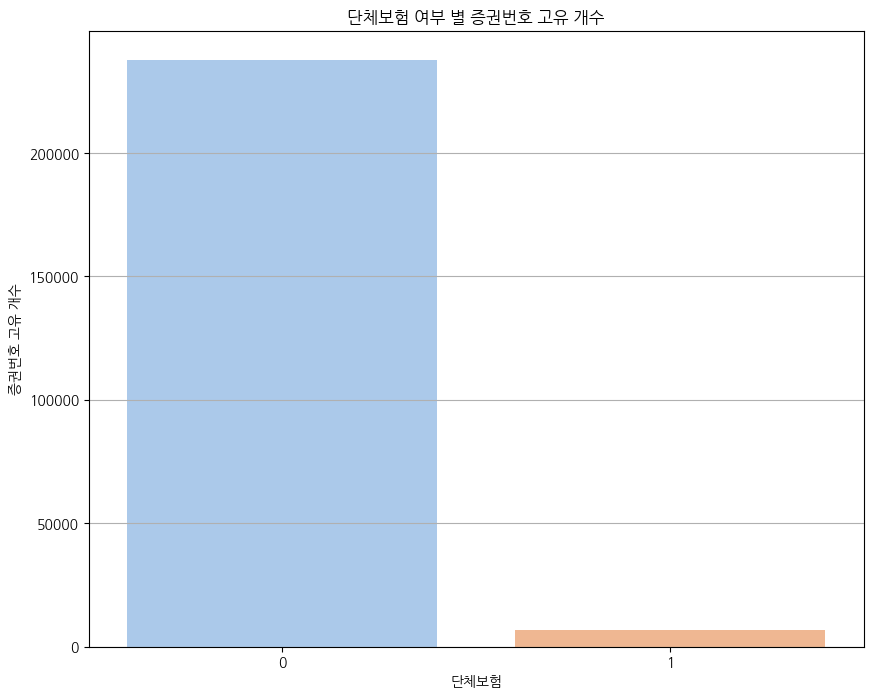

In [8]:
group1 = cont.groupby('IS_GRP_INS')['POL_SN'].nunique().reset_index()

plt.figure(figsize=(10, 8))
sns.barplot(x='IS_GRP_INS', y='POL_SN', data=group1, palette='pastel')
plt.title('단체보험 여부 별 증권번호 고유 개수')
plt.xlabel('단체보험')
plt.ylabel('증권번호 고유 개수')
plt.grid(axis='y')
plt.show()

<ipython-input-10-6e2ba1c75191>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='INS_GBN_CD', y='POL_SN', data=group2, palette='pastel')


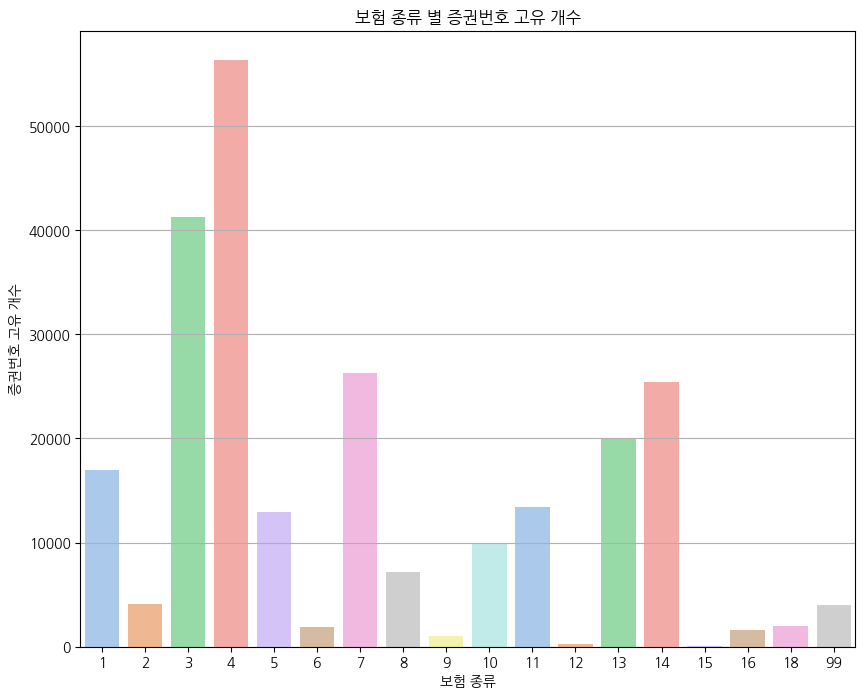

In [10]:
group2 = cont.groupby('INS_GBN_CD')['POL_SN'].nunique().reset_index()

plt.figure(figsize=(10, 8))
sns.barplot(x='INS_GBN_CD', y='POL_SN', data=group2, palette='pastel')
plt.title('보험 종류 별 증권번호 고유 개수')
plt.xlabel('보험 종류')
plt.ylabel('증권번호 고유 개수')
plt.grid(axis='y')
plt.show()

<ipython-input-11-f3dff36dcace>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CT_CHNL_CD', y='POL_SN', data=group3, palette='pastel')


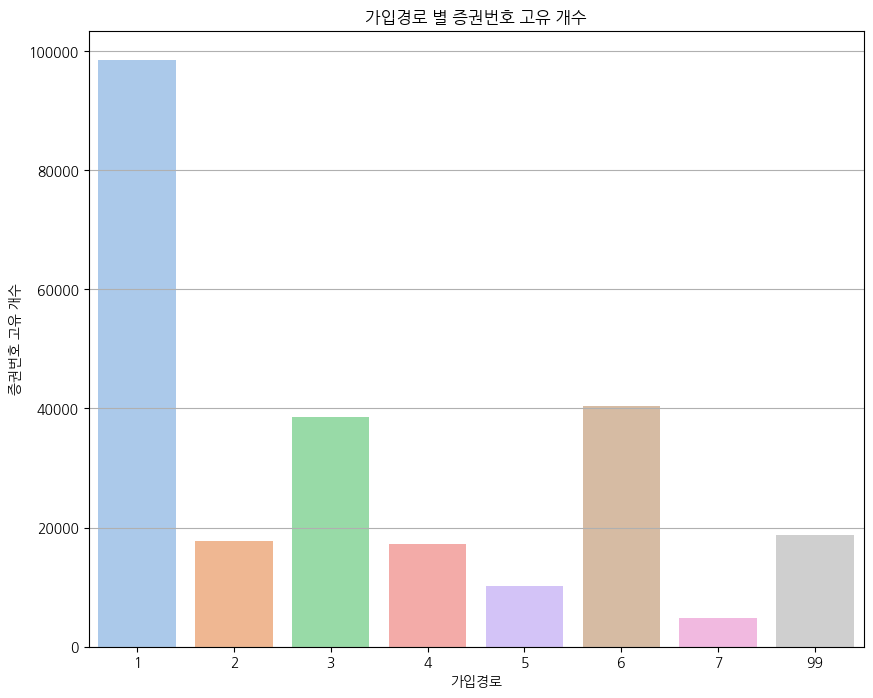

In [11]:
group3 = cont.groupby('CT_CHNL_CD')['POL_SN'].nunique().reset_index()

plt.figure(figsize=(10, 8))
sns.barplot(x='CT_CHNL_CD', y='POL_SN', data=group3, palette='pastel')
plt.title('가입경로 별 증권번호 고유 개수')
plt.xlabel('가입경로')
plt.ylabel('증권번호 고유 개수')
plt.grid(axis='y')
plt.show()

In [20]:
group4 = cont.groupby(['CT_CHNL_CD', 'IS_CT_DIGNS']).size().reset_index(name='counts')

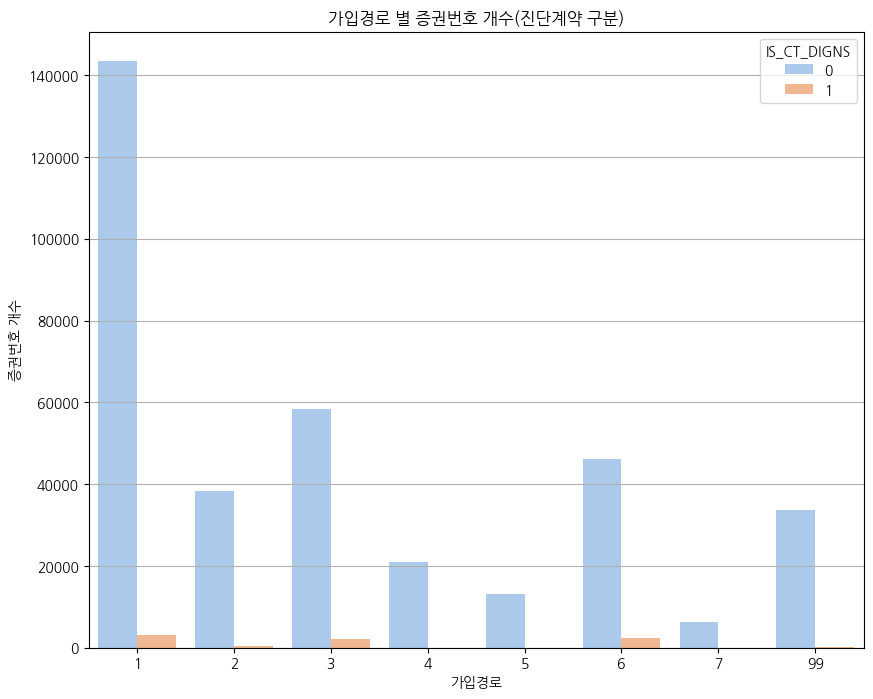

In [23]:
plt.figure(figsize=(10, 8))
sns.barplot(x='CT_CHNL_CD', y='counts', hue='IS_CT_DIGNS', data=group4, palette='pastel')
plt.title('가입경로 별 증권번호 개수(진단계약 구분)')
plt.xlabel('가입경로')
plt.ylabel('증권번호 개수')
plt.grid(axis='y')
plt.show()

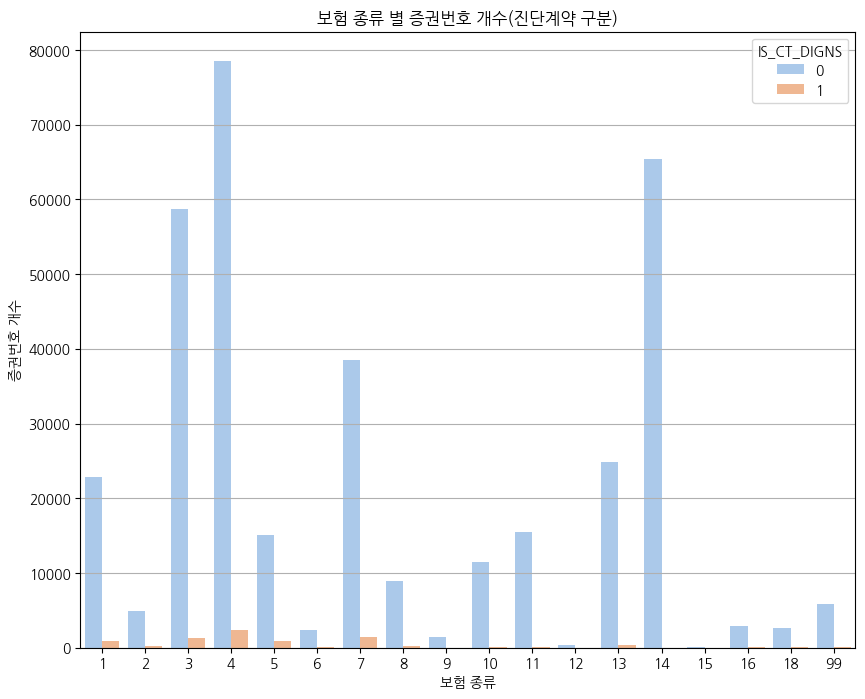

In [27]:
group5 = cont.groupby(['INS_GBN_CD', 'IS_CT_DIGNS']).size().reset_index(name='counts')

plt.figure(figsize=(10, 8))
sns.barplot(x='INS_GBN_CD', y='counts', hue='IS_CT_DIGNS', data=group5, palette='pastel')
plt.title('보험 종류 별 증권번호 개수(진단계약 구분)')
plt.xlabel('보험 종류')
plt.ylabel('증권번호 개수')
plt.grid(axis='y')
plt.show()

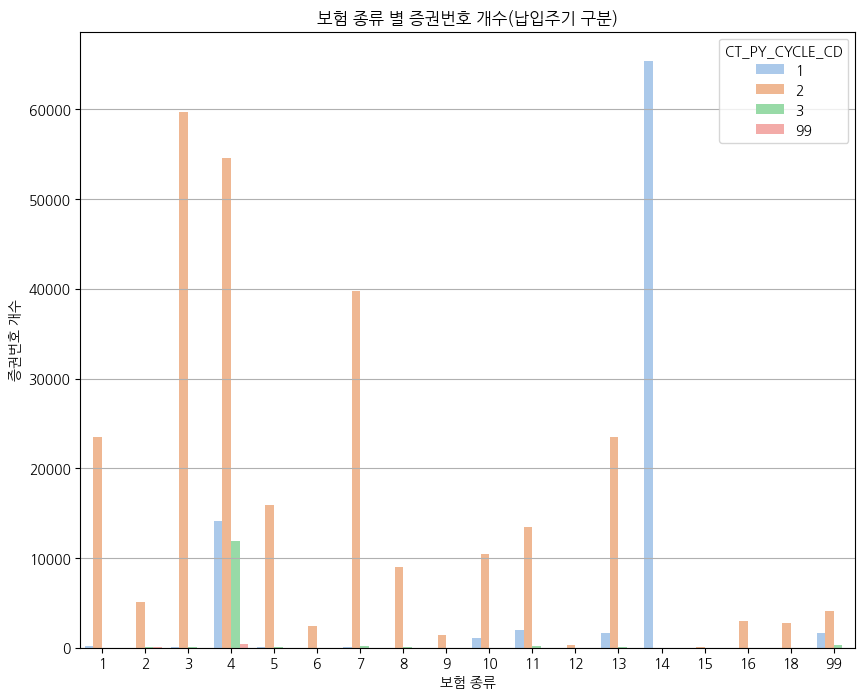

In [25]:
group6 = cont.groupby(['INS_GBN_CD', 'CT_PY_CYCLE_CD']).size().reset_index(name='counts')

plt.figure(figsize=(10, 8))
sns.barplot(x='INS_GBN_CD', y='counts', hue='CT_PY_CYCLE_CD', data=group6, palette='pastel')
plt.title('보험 종류 별 증권번호 개수(납입주기 구분)')
plt.xlabel('보험 종류')
plt.ylabel('증권번호 개수')
plt.grid(axis='y')
plt.show()

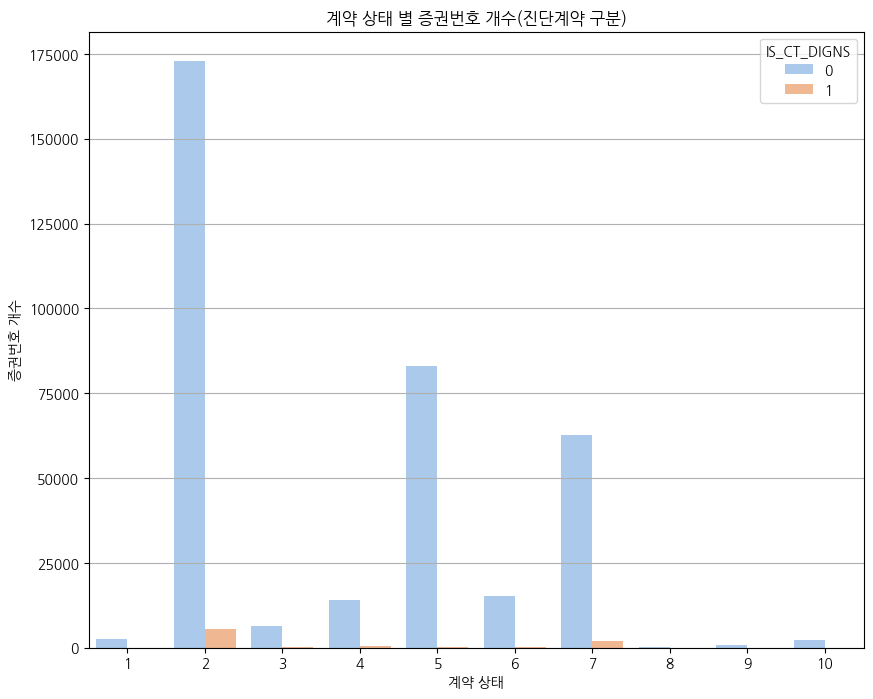

In [28]:
group7 = cont.groupby(['INS_CT_STAT_CD', 'IS_CT_DIGNS']).size().reset_index(name='counts')

plt.figure(figsize=(10, 8))
sns.barplot(x='INS_CT_STAT_CD', y='counts', hue='IS_CT_DIGNS', data=group7, palette='pastel')
plt.title('계약 상태 별 증권번호 개수(진단계약 구분)')
plt.xlabel('계약 상태')
plt.ylabel('증권번호 개수')
plt.grid(axis='y')
plt.show()

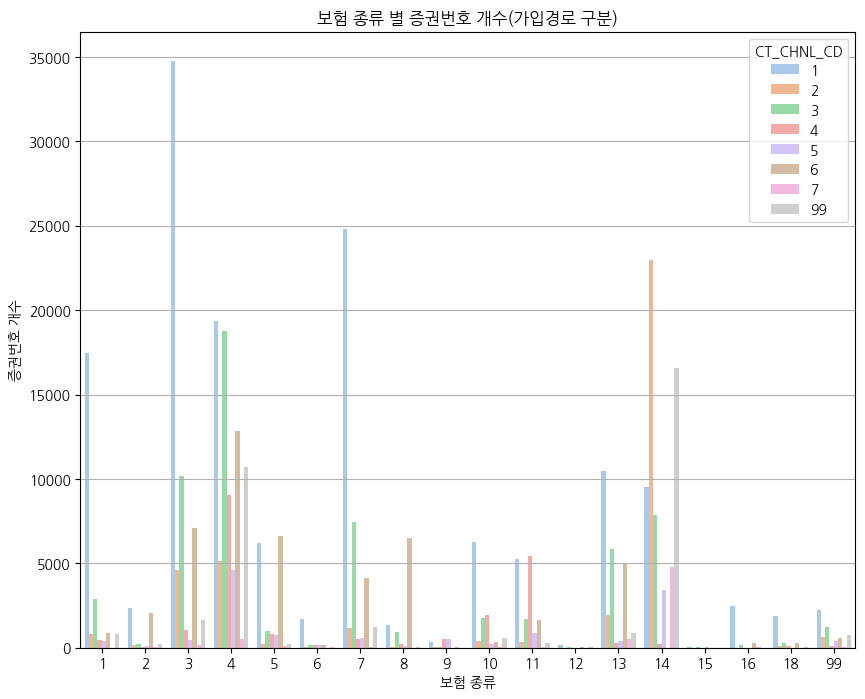

In [29]:
group8 = cont.groupby(['INS_GBN_CD', 'CT_CHNL_CD']).size().reset_index(name='counts')

plt.figure(figsize=(10, 8))
sns.barplot(x='INS_GBN_CD', y='counts', hue='CT_CHNL_CD', data=group8, palette='pastel')
plt.title('보험 종류 별 증권번호 개수(가입경로 구분)')
plt.xlabel('보험 종류')
plt.ylabel('증권번호 개수')
plt.grid(axis='y')
plt.show()

## 1-4. 보험담보정보

1. 군집별 선호하는 담보?

  * MGG_CD(담보코드) 보다는 MGG_GRP_CD(담보 그룹 코드)를 먼저 사용하는 걸 고려하는게 좋을 듯. 담보코드 140개로 너무 많음
  * 담보별 손해율 계산 불가
  * 보험사에서 다 짜놓은 담보 중에서 필수로 들어가는 담보는 당연히 빈도가 높을 수 밖에 없지 않나?
2. 차주일련번호, 증권번호가 보험계약관계자정보 혹은 보험계약정보에서 추출한 정보와 일치하는 경우에만 사용
3. 보험계약정보의 보험종류와 연계하여 보험종류별 담보 그룹/담보 코드를 보는 게 좋지 않을까?

In [ ]:
mgg

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,POL_SN,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,MGG_AMT_MAX,MGG_AMT_MIN,YM_201806,YM_201807,YM_201808,YM_201809,YM_201810,YM_201811,YM_201812,YM_201901,YM_201902,YM_201903,YM_201904,YM_201905,YM_201906,YM_201907,YM_201908,YM_201909,YM_201910,YM_201911,YM_201912,YM_202001,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006
0,499723,1,6,3260523,A5,A5301,1,480,480,480,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,998541,1,6,1272317,A4,A4303,1,400,400,400,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1778522,1,8,3094747,A1,A1400,1,20000,20000,20000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
3,1189610,1,6,7519869,A3,A3300,1,10000,10000,10000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1464515,1,6,1941349,A4,A4299,1,45000,45000,45000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408802,1737843,1,6,667896,A1,A1400,1,90000,90000,90000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1408803,21056,1,6,1660383,A6,A6200,1,100,100,100,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1408804,1537144,1,6,5663552,A3,A3300,1,9000,9000,9000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1408805,1608352,1,6,9919009,A4,A4102,1,4000,4000,4000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [30]:
p_mgg = mgg[mgg['JOIN_SN_TYP'] == 1]

In [ ]:
mgg.agg(['count', 'size', 'nunique'])

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,POL_SN,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,MGG_AMT_MAX,MGG_AMT_MIN,YM_201806,YM_201807,YM_201808,YM_201809,YM_201810,YM_201811,YM_201812,YM_201901,YM_201902,YM_201903,YM_201904,YM_201905,YM_201906,YM_201907,YM_201908,YM_201909,YM_201910,YM_201911,YM_201912,YM_202001,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006
count,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807
size,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807
nunique,50143,1,3,115467,13,140,31,311,310,311,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [ ]:
p_mgg.agg(['count', 'size', 'nunique'])

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,POL_SN,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,MGG_AMT_MAX,MGG_AMT_MIN,YM_201806,YM_201807,YM_201808,YM_201809,YM_201810,YM_201811,YM_201812,YM_201901,YM_201902,YM_201903,YM_201904,YM_201905,YM_201906,YM_201907,YM_201908,YM_201909,YM_201910,YM_201911,YM_201912,YM_202001,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006
count,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807
size,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807
nunique,50143,1,3,115467,13,140,31,311,310,311,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [ ]:
p_mgg['SCTR_CD'].unique()
# 업권 코드가 3 : 신협

array([6, 8, 3])

In [ ]:
dupl_mgg = p_mgg[p_mgg.duplicated(subset=['POL_SN'], keep=False)].sort_values(by='POL_SN')
dupl_mgg

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,POL_SN,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,MGG_AMT_MAX,MGG_AMT_MIN,YM_201806,YM_201807,YM_201808,YM_201809,YM_201810,YM_201811,YM_201812,YM_201901,YM_201902,YM_201903,YM_201904,YM_201905,YM_201906,YM_201907,YM_201908,YM_201909,YM_201910,YM_201911,YM_201912,YM_202001,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006
230581,902434,1,6,8,A4,A4302,1,350,350,350,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
625905,902434,1,6,8,A5,A5399,2,15000,14000,1400,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
307120,902434,1,6,8,A4,A4301,1,350,350,350,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
832586,902434,1,6,8,A5,A5301,1,490,490,490,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1296031,902434,1,6,8,A6,A6350,1,100,100,100,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716610,545697,1,6,9997320,A5,A5999,12,19000,8000,160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
305233,545697,1,6,9997320,A4,A4199,6,34000,8000,240,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
345685,545697,1,6,9997320,A4,A4210,1,8000,8000,8000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
956310,545697,1,6,9997320,A6,A6350,1,100,100,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


<ipython-input-33-41fdef2ff8b3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MGG_GRP_CD', y='counts', data=gRoup1, palette='pastel')


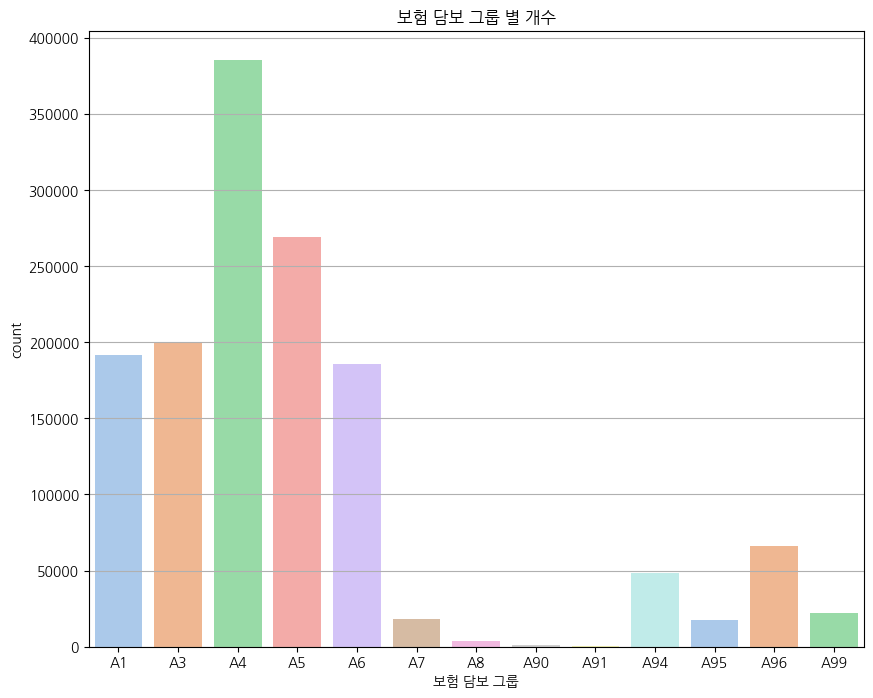

In [33]:
gRoup1 = p_mgg.groupby(['MGG_GRP_CD']).size().reset_index(name='counts')

plt.figure(figsize=(10, 8))
sns.barplot(x='MGG_GRP_CD', y='counts', data=gRoup1, palette='pastel')
plt.title('보험 담보 그룹 별 개수')
plt.xlabel('보험 담보 그룹')
plt.ylabel('count')
plt.grid(axis='y')
plt.show()

<ipython-input-34-56e47475ec49>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MGG_CD', y='MGG_CNT', data=a1_mgg, palette='pastel')


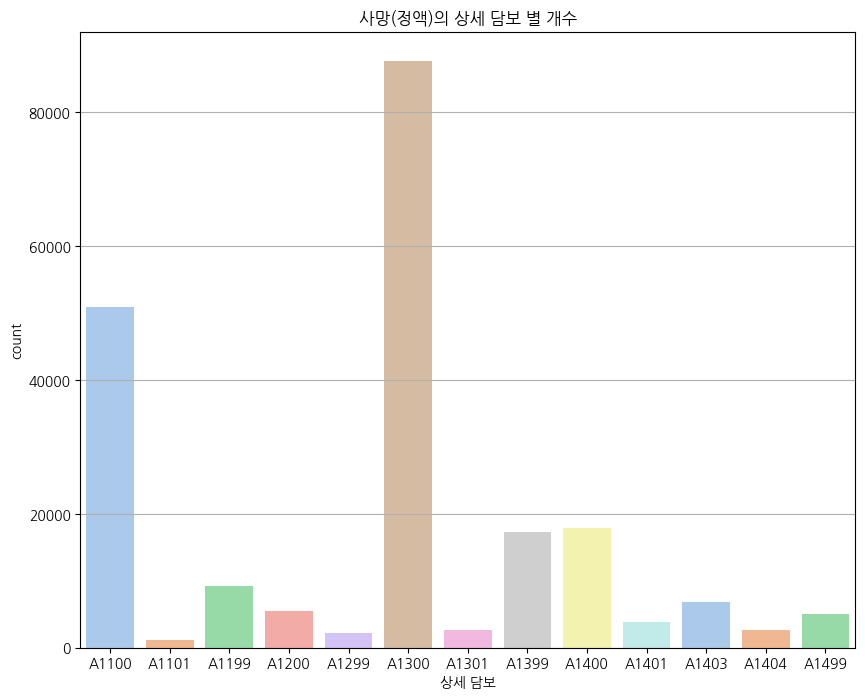

In [34]:
a1 = p_mgg[p_mgg['MGG_GRP_CD'] == 'A1']
a1_mgg = a1.groupby(['MGG_CD'])['MGG_CNT'].sum().reset_index()

plt.figure(figsize=(10, 8))
sns.barplot(x='MGG_CD', y='MGG_CNT', data=a1_mgg, palette='pastel')
plt.title('사망(정액)의 상세 담보 별 개수')
plt.xlabel('상세 담보')
plt.ylabel('count')
plt.grid(axis='y')
plt.show()

<ipython-input-35-a89e2a795797>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MGG_CD', y='MGG_CNT', data=a3_mgg, palette='pastel')


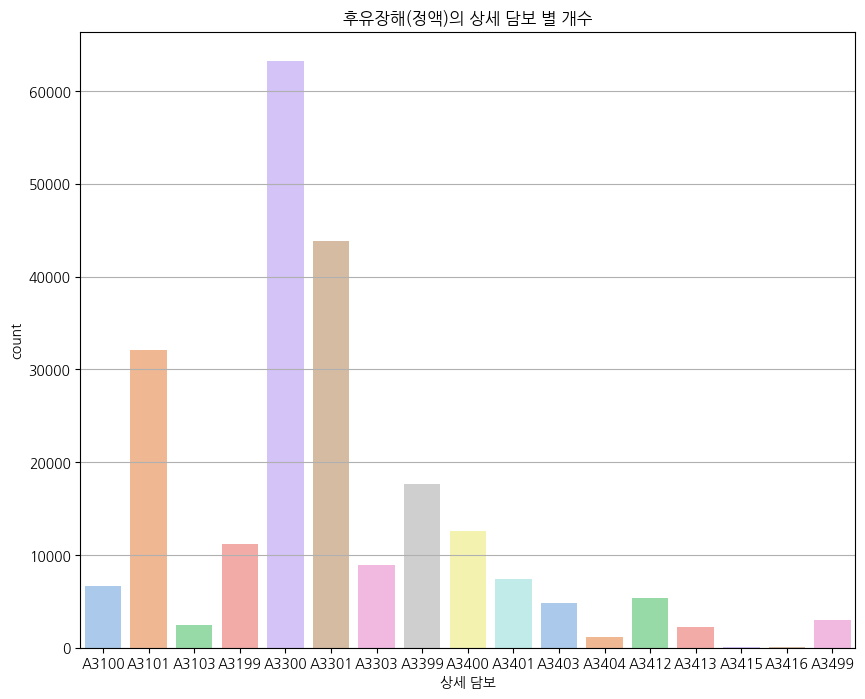

In [35]:
a3 = p_mgg[p_mgg['MGG_GRP_CD'] == 'A3']
a3_mgg = a3.groupby(['MGG_CD'])['MGG_CNT'].sum().reset_index()

plt.figure(figsize=(10, 8))
sns.barplot(x='MGG_CD', y='MGG_CNT', data=a3_mgg, palette='pastel')
plt.title('후유장해(정액)의 상세 담보 별 개수')
plt.xlabel('상세 담보')
plt.ylabel('count')
plt.grid(axis='y')
plt.show()

<ipython-input-37-f90bc0e4c66d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MGG_CD', y='MGG_CNT', data=a4_mgg, palette='pastel')


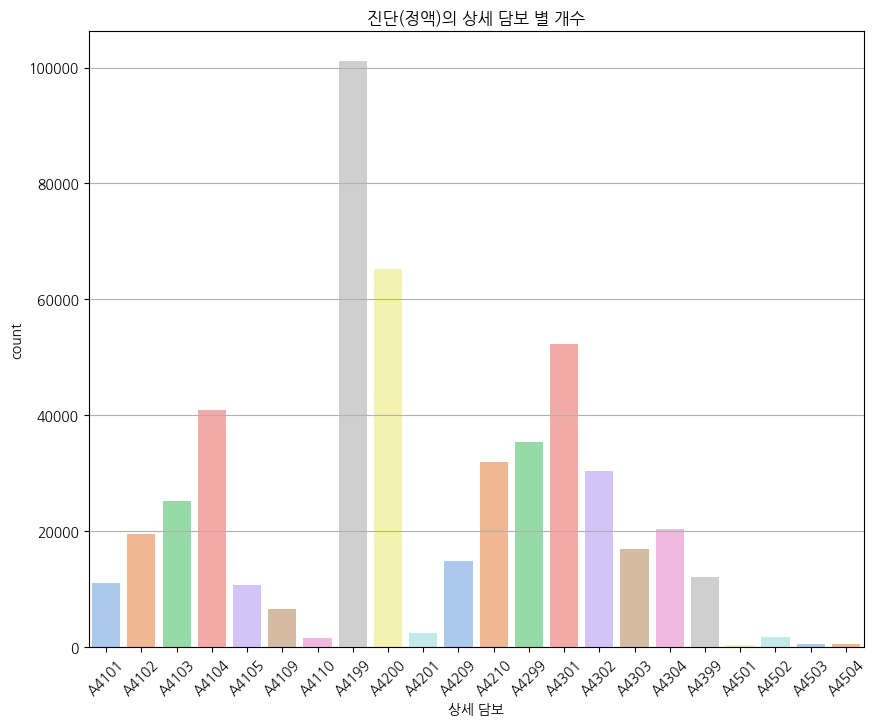

In [37]:
a4 = p_mgg[p_mgg['MGG_GRP_CD'] == 'A4']
a4_mgg = a4.groupby(['MGG_CD'])['MGG_CNT'].sum().reset_index()

plt.figure(figsize=(10, 8))
sns.barplot(x='MGG_CD', y='MGG_CNT', data=a4_mgg, palette='pastel')
plt.title('진단(정액)의 상세 담보 별 개수')
plt.xlabel('상세 담보')
plt.ylabel('count')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

<ipython-input-38-6b61dc2733af>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MGG_CD', y='MGG_CNT', data=a5_mgg, palette='pastel')


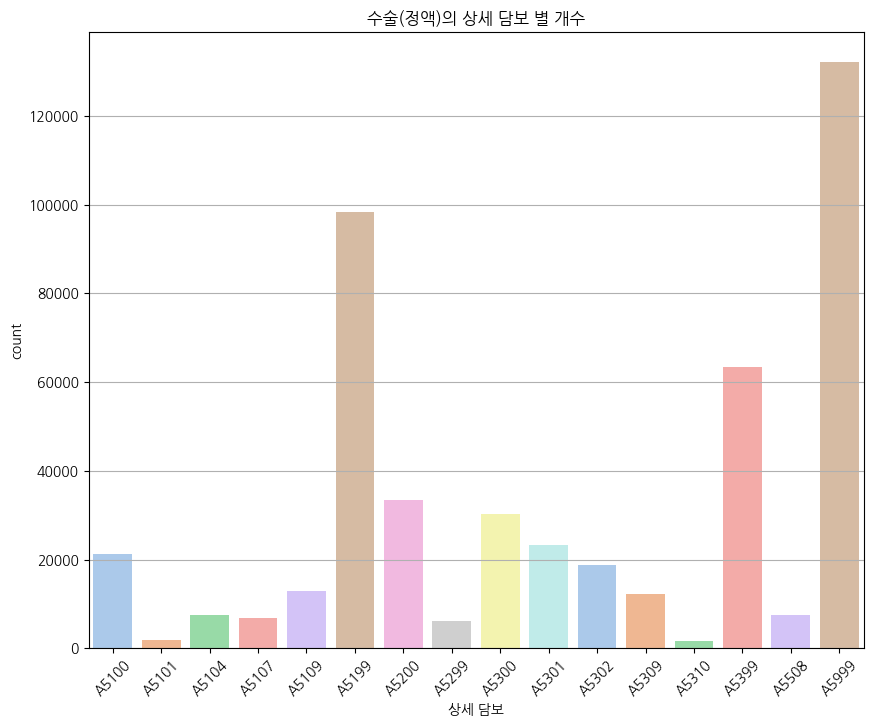

In [38]:
a5 = p_mgg[p_mgg['MGG_GRP_CD'] == 'A5']
a5_mgg = a5.groupby(['MGG_CD'])['MGG_CNT'].sum().reset_index()

plt.figure(figsize=(10, 8))
sns.barplot(x='MGG_CD', y='MGG_CNT', data=a5_mgg, palette='pastel')
plt.title('수술(정액)의 상세 담보 별 개수')
plt.xlabel('상세 담보')
plt.ylabel('count')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

## 1-5. 청구지급사유정보

1. 청구사고정보, 청구계약번호 결합 시, 사고번호와 청구번호가 일치하는 것으로 데이터 결합
2. 차주일련번호가 보험계약관계자정보에서 추출한 정보와 일치하는 경우에만 사용
3. IN_DRV_RLTN_CD(피-운전자 관계코드) : 자동차보험 사고에 대해서만 등록된 데이터, 자동차보험을 좀 더 딥하게 볼 게 아니면 삭제
4. ACCD_GIS_CD(사고지역코드) : 자동차보험 사고에 대해서만 등록된 데이터, 자동차보험을 좀 더 딥하게 볼 게 아니면 삭제
5. 거주지역코드, 사고발생월, 최초사고접수월이 필요한게 아니면 없애도 될 테이블 같음

In [ ]:
accd

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,ACCD_SN,REQ_SN,IS_INDIV,GIS_CD,ACCD_DT,FST_RPT_DT,ACCD_GIS_CD,IN_DRV_RLTN_CD
0,514694,1,8,5561038,0,2292889,839524,1,99,201905,201905,99,0
1,1666172,1,8,1604841,0,598965,1898453,1,36,201902,201905,99,0
2,67340,1,6,5144128,0,797919,672190,1,23,202006,202006,23,99
3,1790965,1,3,8278365,0,1132823,1609635,1,38,201904,201904,99,0
4,980616,1,6,8670561,0,673077,566526,1,11,201911,202003,99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41342,470724,1,8,275275,0,1252459,1431063,1,25,201901,201906,99,0
41343,81437,1,6,8020811,0,2130087,1794822,1,33,202001,202001,99,0
41344,689368,1,6,6513234,0,376683,547171,1,99,201806,201807,99,0
41345,263114,1,3,1108441,0,76699,672689,1,39,201909,202003,99,0


In [ ]:
p_accd = accd[accd['JOIN_SN_TYP'] == 1]

In [ ]:
accd.agg(['count', 'size', 'nunique'])

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,ACCD_SN,REQ_SN,IS_INDIV,GIS_CD,ACCD_DT,FST_RPT_DT,ACCD_GIS_CD,IN_DRV_RLTN_CD
count,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347
size,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347
nunique,17591,1,3,22189,1,39650,33603,1,17,25,25,17,6


In [ ]:
p_accd.agg(['count', 'size', 'nunique'])

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,ACCD_SN,REQ_SN,IS_INDIV,GIS_CD,ACCD_DT,FST_RPT_DT,ACCD_GIS_CD,IN_DRV_RLTN_CD
count,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347
size,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347
nunique,17591,1,3,22189,1,39650,33603,1,17,25,25,17,6


In [ ]:
dupl_accd = p_accd[p_accd.duplicated(subset=['ACCD_SN', 'REQ_SN'], keep=False)].sort_values(by='ACCD_SN')
dupl_accd

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,ACCD_SN,REQ_SN,IS_INDIV,GIS_CD,ACCD_DT,FST_RPT_DT,ACCD_GIS_CD,IN_DRV_RLTN_CD


## 1-6. 청구지급사유상세정보

1. 보험계약관계자정보에 있는 증권번호에 대해서만 진행?
2. VCTM_SN(피해자물일련번호) : 삭제
3. 보험금 지급 금액이 0이면 청구 건수에서 삭제
4. 보험금 지급 금액이 음수이면 환수 건으로, 총 보험금 지급 금액에는 합산하고 청구 건수에서는 삭제하는게 타당해보임


In [ ]:
pmntdtl

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT
0,1132050,953774,8,8482978,1172,A1001,201809,1,1,10000
1,2141286,76910,6,3612735,23,B2001,202001,1,1,9400
2,1493931,1258813,6,9435298,2857,C1003,202003,12,1,600
3,122531,103007,6,7984136,665,B2001,202002,1,1,1300
4,1740460,1466487,6,3332223,3298,B2002,201909,1,1,200
...,...,...,...,...,...,...,...,...,...,...
71244,385388,324468,6,7894826,665,B2002,201910,1,1,170
71245,1410627,1754272,6,6915229,2547,B2002,201811,1,1,11
71246,430262,619986,6,7199202,2547,B2002,201809,1,1,78
71247,2253620,669803,6,5925060,2547,B2001,201807,1,1,1200


In [ ]:
pmntdtl.agg(['count', 'size', 'nunique'])

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT
count,71249,71249,71249,71249,71249,71249,71249,71249,71249,71249
size,71249,71249,71249,71249,71249,71249,71249,71249,71249,71249
nunique,37890,31945,3,24719,356,50,25,12,13,273


In [ ]:
dupl_pmntdtl = pmntdtl[pmntdtl.duplicated(subset=['ACCD_SN', 'REQ_SN'], keep=False)].sort_values(by='ACCD_SN')
dupl_pmntdtl

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT
50527,32,1602585,6,2224046,2547,A1020,201907,1,1,39
67265,32,1602585,6,2224046,2547,B2005,201907,1,1,76
32340,58,42,6,6438304,2040,B2002,202005,1,1,58
29344,58,42,6,6438304,2040,B2002,202005,1,1,120
8454,362,955442,6,2650623,1476,B2001,201902,1,1,100
...,...,...,...,...,...,...,...,...,...,...
51606,2302099,1939578,6,4383405,2199,B2007,202001,1,1,35
8503,2302211,679643,6,4722373,23,A1009,201806,1,1,65
3908,2302211,679643,6,4722373,23,B2001,201806,1,1,380
29787,2302234,1939682,6,5841131,2199,B2001,201903,1,1,89
